# 1. 데이터 전처리

In [8]:
import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


import warnings
warnings.filterwarnings('ignore')

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

matplotlib.rc("axes", unicode_minus = False)

In [11]:
from google.colab import drive
path = drive.mount('/content/drive')

# csv 파일이 저장'된' 경로
csv_path = '/content/drive/MyDrive/개인/포스코/본수업/2주차/수업/실습파일/Car.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# 파일 읽기
df = pd.read_csv(csv_path)
df.head(3)

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh


In [13]:
# 수치형 값과 문자형 값을 구분
df[['Mileage_kmpl','Mileage']]= df['Mileage'].str.split(expand=True)
df[['Engine_CC','Engine']]= df['Engine'].str.split(expand=True)
df[['Power_bhp','Power']]= df['Power'].str.split(expand=True)
df[['New_Price_Lakh','New_Price']]= df['New_Price'].str.split(expand=True)

In [14]:
# 수치형 변수 float형으로 변환

df['Mileage_kmpl'] = df['Mileage_kmpl'].astype('float')
df['Engine_CC'] = df['Engine_CC'].astype('float')
df['Power_bhp'] = df['Power_bhp'].replace('null', np.nan)
df['Power_bhp'] = df['Power_bhp'].astype('float')

df['New_Price_Lakh'] = df['New_Price_Lakh'].replace('null', np.nan)
df['New_Price_Lakh'] = df['New_Price_Lakh'].astype('float')

In [15]:
# 문자형 값을 나타낸 열 제거

df.drop(columns=['Mileage','Engine','Power','New_Price'], inplace=True)

### 이상치, 결측치 확인 및 제거

In [16]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Seats              7200 non-null   float64
 9   Mileage_kmpl       7251 non-null   float64
 10  Engine_CC          7207 non-null   float64
 11  Power_bhp          7078 non-null   float64
 12  New_Price_Lakh     1006 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
Mileage_kmpl            2
Engine_CC              46
Power_bhp             175
New_Price_Lakh       6247
dtype: int64

In [17]:
df_train = df[df['Price'].notnull()]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 7236
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6200 non-null   object 
 1   Location           6200 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               6200 non-null   int64  
 4   Kilometers_Driven  6200 non-null   int64  
 5   Fuel_Type          6200 non-null   object 
 6   Transmission       6200 non-null   object 
 7   Owner_Type         6200 non-null   object 
 8   Seats              6158 non-null   float64
 9   Mileage_kmpl       6198 non-null   float64
 10  Engine_CC          6164 non-null   float64
 11  Power_bhp          6057 non-null   float64
 12  New_Price_Lakh     1005 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 678.1+ KB


In [18]:
df_train[df_train['Name']=='Honda City 1.5 GXI'] # 전체 데이터에서 모델명이 동일하면 좌석, 엔진, 파워 동일하게 채움
df_train.loc[df_train['Name']=='Honda City 1.5 GXI', 'Seats'] = 5.0
df_train.loc[df_train['Name']=='Honda City 1.5 GXI', 'Mileage_kmpl'] = 12.8
df_train.loc[df_train['Name']=='Honda City 1.5 GXI', 'Power_bhp'] = 100.0

In [19]:
df_train[df_train['Name']=='Toyota Etios Liva V'] # 전체 데이터에서 모델명이 동일하면 좌석, 엔진, 파워 동일하게 채움
df_train.loc[df_train['Name']=='Toyota Etios Liva V', 'Seats'] = 5.0
df_train.loc[(df_train['Name']=='Toyota Etios Liva V') & (df_train['Engine_CC'].isnull()), 'Engine_CC'] = round((1197.0*1.033),0) # 동일한 모델이지만 마일값이 1.03배 만큼 차이남
df_train.loc[(df_train['Name']=='Toyota Etios Liva V') & (df_train['Power_bhp'].isnull()), 'Power_bhp'] = round((78.9*1.033),1)        # 엔진, 파워도 1.03배 만큼 증가시킴

In [20]:
df_train[df_train['Name']=='Toyota Etios Liva V']

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,New_Price_Lakh
2264,Toyota Etios Liva V,Pune,4522.23,2012,24500,Petrol,Manual,Second,5.0,18.30,1237.0,81.5,NaN
4138,Toyota Etios Liva V,Mumbai,5442.01,2013,8950,Petrol,Manual,First,5.0,17.71,1197.0,78.9,NaN


In [21]:
df_train[['Brand' , 'Name']] = df_train['Name'].str.split(n=1, expand=True)

In [22]:
df_train = df_train[df_train.groupby('Brand')['Brand'].transform('size') >= 50]
df_train = df_train[df_train.groupby('Year')['Year'].transform('size') >= 50]

In [23]:
# 같은 제조사의 같은 시리즈 명의 엔진, 좌석, 파워의 평균을 넣어준다.

# Swift_Mil_mean=df_train[df_train['Name'].str.contains('Swift')]['Mileage_kmpl'].mean()
Swift_Seat = df_train[df_train['Name'].str.contains('Swift')]['Seats'].mean() # 5밖에 없어서 5임
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Swift')]['Engine_CC'].mean() # 평균들을 다 구해준다.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Swift')]['Power_bhp'].mean()

In [24]:
df_train.loc[(df_train['Name'].str.contains('Swift')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Swift')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Swift')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean

In [25]:
df_train[(df_train['Name'].str.contains('Swift')) & (df_train['Engine_CC'].isnull())]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand


In [26]:
df_train[df_train['Engine_CC'].isnull()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand
194,City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,5.0,12.80,NaN,100.0,NaN,Honda
749,Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,NaN,0.00,NaN,NaN,NaN,Land
1294,City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,NaN,12.80,NaN,NaN,NaN,Honda
1460,Rover Range Rover Sport 2005 2012 Sport,Coimbatore,62667.40,2008,69078,Petrol,Manual,First,NaN,0.00,NaN,NaN,NaN,Land
2530,5 Series 520d Sedan,Kochi,27424.65,2014,64158,Diesel,Automatic,First,NaN,18.48,NaN,NaN,NaN,BMW
2542,Santro GLS II - Euro II,Bangalore,4828.82,2011,65000,Petrol,Manual,Second,NaN,0.00,NaN,NaN,NaN,Hyundai
2623,5 Series 520d Sedan,Pune,27593.28,2012,95000,Diesel,Automatic,Second,NaN,18.48,NaN,NaN,NaN,BMW
2780,Santro GLS II - Euro II,Pune,2452.74,2009,100000,Petrol,Manual,First,NaN,0.00,NaN,NaN,NaN,Hyundai
2842,Santro GLS II - Euro II,Bangalore,4982.12,2012,43000,Petrol,Manual,First,NaN,0.00,NaN,NaN,NaN,Hyundai
3272,5 Series 520d Sedan,Mumbai,16096.08,2008,81000,Diesel,Automatic,Second,NaN,18.48,NaN,NaN,NaN,BMW


In [27]:
# City 1.5 GXI 차량의 Engine 결측값 대체

df_train.loc[(df_train['Name'].str.contains('City 1.5 GXI')), 'Engine_CC'] = 1493.0

In [28]:
df_train.loc[(df_train['Name'].str.contains('5 Series 520d'))& (df_train['Engine_CC'].isnull()),'Engine_CC' ] = 1995.0
df_train.loc[(df_train['Name'].str.contains('5 Series 520d'))& (df_train['Power_bhp'].isnull()),'Power_bhp' ] = 190.00
df_train.loc[(df_train['Name'].str.contains('5 Series 520d'))& (df_train['Seats'].isnull()),'Seats' ] = 5.0

In [29]:
df_train.loc[(df_train['Name'].str.contains('Santro'))& (df_train['Engine_CC'].isnull()),'Engine_CC'] = 1086.0
df_train.loc[(df_train['Name'].str.contains('Santro'))& (df_train['Power_bhp'].isnull()),'Power_bhp'] = 62
df_train.loc[(df_train['Name'].str.contains('Santro'))& (df_train['Mileage_kmpl']==0),'Mileage_kmpl'] = 17.92

In [30]:
df_train[df_train['Power_bhp'].isnull()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand
76,Fiesta 1.4 SXi TDCi,Jaipur,3065.92,2008,111111,Diesel,Manual,First,5.0,17.80,1399.0,NaN,NaN,Ford
424,Jetta 2007-2011 1.9 L TDI,Hyderabad,8354.63,2010,42021,Diesel,Manual,First,5.0,0.00,1968.0,NaN,NaN,Volkswagen
472,Fiesta 1.6 SXI ABS Duratec,Chennai,3832.40,2009,80524,Petrol,Manual,Second,5.0,15.30,1596.0,NaN,NaN,Ford
648,Indica DLS,Jaipur,1149.72,2009,82000,Diesel,Manual,Second,5.0,13.50,1405.0,NaN,NaN,Tata
749,Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,NaN,0.00,NaN,NaN,NaN,Land
829,Etios Liva G,Mumbai,3740.42,2012,29605,Petrol,Manual,First,5.0,18.30,1197.0,NaN,NaN,Toyota
934,Etios GD,Kolkata,4522.23,2012,60000,Diesel,Manual,First,5.0,23.59,1364.0,NaN,NaN,Toyota
1068,Etios Liva GD,Pune,3985.70,2012,225000,Diesel,Manual,Second,5.0,23.59,1364.0,NaN,NaN,Toyota
1294,City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,NaN,12.80,NaN,NaN,NaN,Honda
1345,Baleno Vxi,Pune,1992.85,2005,70000,Petrol,Manual,First,5.0,0.00,1590.0,NaN,NaN,Maruti


In [31]:
Swift_Seat = df_train[df_train['Name'].str.contains('Etios')]['Seats'].mode()[0]
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Etios')]['Engine_CC'].mean() # 평균들을 다 구해준다.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Etios')]['Power_bhp'].mean()
Swift_Mil_mode = df_train[df_train['Name'].str.contains('Etios')]['Mileage_kmpl'].mode()[0]

df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean
df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Mileage_kmpl']==0), 'Mileage_kmpl']= Swift_Mil_mode

In [32]:
Swift_Seat = df_train[df_train['Name'].str.contains('Fiesta')]['Seats'].mode()[0] # 5밖에 없어서 5임
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Fiesta')]['Engine_CC'].mean() # 평균들을 다 구해준다.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Fiesta')]['Power_bhp'].mean()
Swift_Mil_mode = df_train[df_train['Name'].str.contains('Fiesta')]['Mileage_kmpl'].mode()[0]

df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean
df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Mileage_kmpl']==0), 'Mileage_kmpl']= Swift_Mil_mode

In [33]:
df_train[df_train['Power_bhp'].isnull()]['Name'].value_counts()

Estilo LXI                                 3
Indica DLS                                 3
Jetta 2007-2011 1.9 L TDI                  1
CR-V Sport                                 1
Endeavour XLT TDCi 4X4                     1
E-Class 220 CDI                            1
Jazz Select Edition                        1
Baleno LXI - BSIII                         1
A4 3.2 FSI Tiptronic Quattro               1
CR-V AT With Sun Roof                      1
Endeavour Hurricane LE                     1
Esteem Vxi                                 1
Teana 230jM                                1
Jeep MM 550 PE                             1
Micra Diesel                               1
Bolero ZLX                                 1
Optra 1.6 Elite                            1
Rover Range Rover Sport 2005 2012 Sport    1
Baleno Vxi                                 1
City 1.3 DX                                1
Rover Range Rover 3.0 D                    1
Laura Classic 1.8 TSI                      1
Name: Name

In [34]:
Swift_Seat = df_train[df_train['Name'].str.contains('Indica')]['Seats'].mode()[0] # 5밖에 없어서 5임
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Indica')]['Engine_CC'].mean() # 평균들을 다 구해준다.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Indica')]['Power_bhp'].mean()
Swift_Mil_mode = df_train[df_train['Name'].str.contains('Indica')]['Mileage_kmpl'].mode()[0]

df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean
df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Mileage_kmpl']==0), 'Mileage_kmpl']= Swift_Mil_mode

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 7236
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5901 non-null   object 
 1   Location           5901 non-null   object 
 2   Price              5901 non-null   float64
 3   Year               5901 non-null   int64  
 4   Kilometers_Driven  5901 non-null   int64  
 5   Fuel_Type          5901 non-null   object 
 6   Transmission       5901 non-null   object 
 7   Owner_Type         5901 non-null   object 
 8   Seats              5885 non-null   float64
 9   Mileage_kmpl       5899 non-null   float64
 10  Engine_CC          5896 non-null   float64
 11  Power_bhp          5878 non-null   float64
 12  New_Price_Lakh     924 non-null    float64
 13  Brand              5901 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 691.5+ KB


In [36]:
df_train.corr()

,Price,Year,Kilometers_Driven,Seats,Mileage_kmpl,Engine_CC,Power_bhp,New_Price_Lakh
Price,1.000000,0.305209,0.002623,0.103620,-0.333777,0.637293,0.755078,0.716036
Year,0.305209,1.000000,-0.166967,0.015403,0.287444,-0.065361,0.010020,-0.021613
Kilometers_Driven,0.002623,-0.166967,1.000000,0.079241,-0.062038,0.100451,0.043398,0.033370
Seats,0.103620,0.015403,0.079241,1.000000,-0.352125,0.444276,0.149466,0.011405
Mileage_kmpl,-0.333777,0.287444,-0.062038,-0.352125,1.000000,-0.644598,-0.550340,-0.334119
Engine_CC,0.637293,-0.065361,0.100451,0.444276,-0.644598,1.000000,0.861389,0.608717
Power_bhp,0.755078,0.010020,0.043398,0.149466,-0.550340,0.861389,1.000000,0.725982
New_Price_Lakh,0.716036,-0.021613,0.033370,0.011405,-0.334119,0.608717,0.725982,1.000000


In [37]:
df_train = df_train.drop(df_train[df_train['Seats']==0].index) # seats가 0인 값 제거
df_train = df_train.drop(df_train[df_train['Mileage_kmpl']<5].index) # mileage <5 제거

In [38]:
df_train.drop(columns="New_Price_Lakh", inplace=True)

In [39]:
df_train.isnull().sum()
df_train.dropna(subset=['Price'], inplace=True)

In [40]:
df_train.isnull().sum()

Name                  0
Location              0
Price                 0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Seats                13
Mileage_kmpl          2
Engine_CC             3
Power_bhp            17
Brand                 0
dtype: int64

In [41]:
df_train.dropna(subset="Power_bhp",inplace=True)
df_train['Seats'].fillna(df_train['Seats'].mode()[0], inplace=True)
df_train.dropna(subset="Mileage_kmpl",inplace=True)

In [42]:
df_train.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Mileage_kmpl         0
Engine_CC            0
Power_bhp            0
Brand                0
dtype: int64

<Axes: ylabel='Price'>

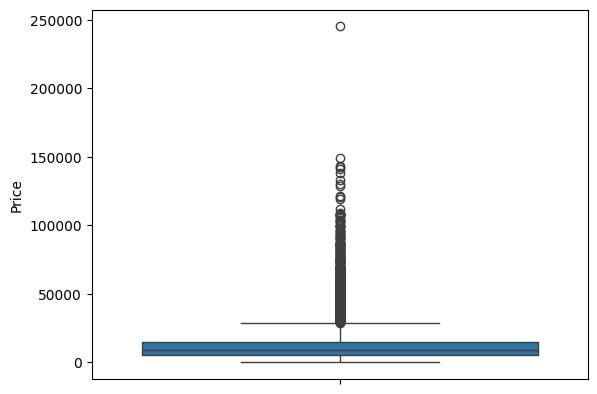

In [43]:
sns.boxplot(df_train['Price'])

In [44]:
df_train.drop(df_train[df_train['Price']>160000].index, inplace=True) # 주행거리 이상치 제거

<Axes: ylabel='Price'>

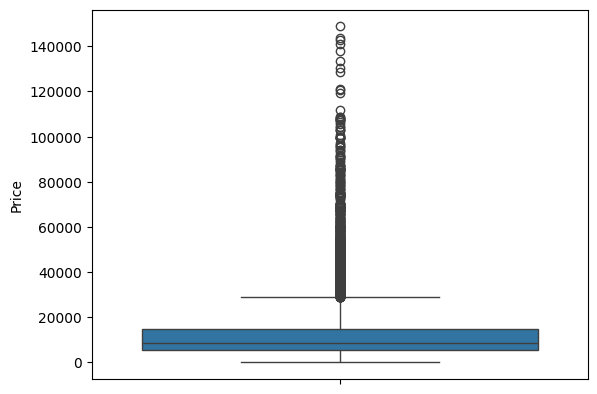

In [45]:
sns.boxplot(df_train['Price'])

In [46]:
df_train.drop(columns="Name", inplace=True) # 이름 변수 제거

<Axes: >

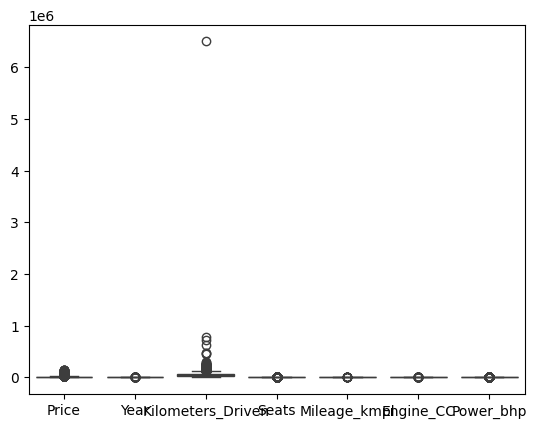

In [47]:
sns.boxplot(df_train)

<Axes: xlabel='Kilometers_Driven'>

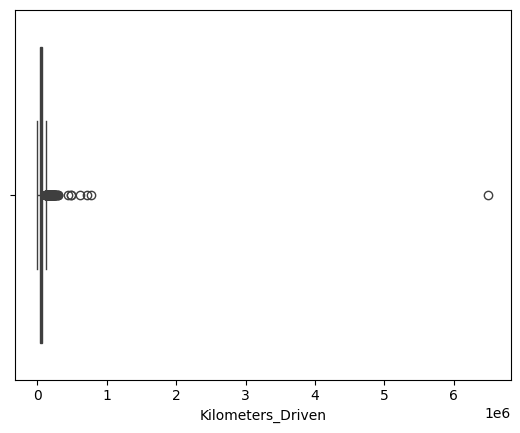

In [48]:
sns.boxplot(x="Kilometers_Driven", data=df_train)

In [49]:
df_train.drop(df_train[df_train['Kilometers_Driven']>3000000].index, inplace=True) # 주행거리 이상치 제거

<Axes: xlabel='Kilometers_Driven'>

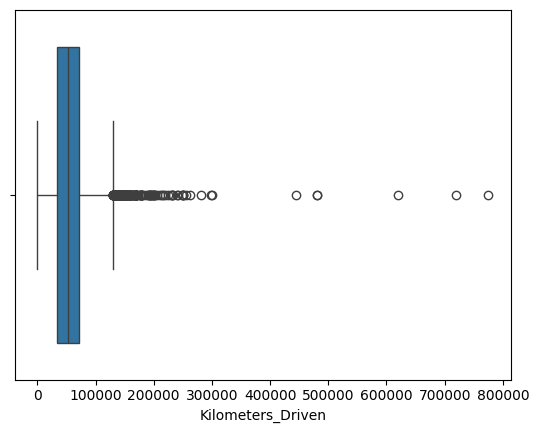

In [50]:
sns.boxplot(x="Kilometers_Driven", data=df_train)

<Axes: xlabel='Price', ylabel='Count'>

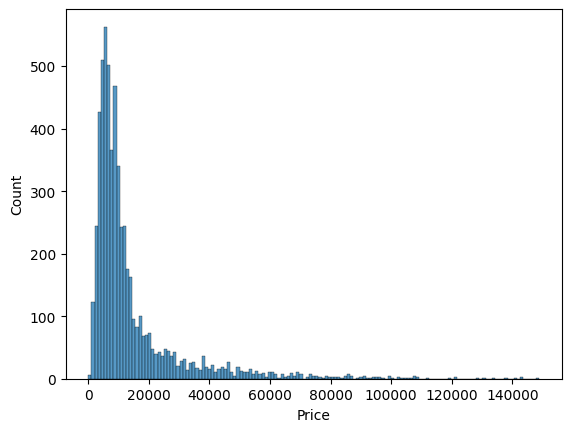

In [51]:
sns.histplot(x="Price", data=df_train) # 변환 필요해 보임

### 파생변수 추가

In [52]:
df_train['Year'].value_counts()

2014    777
2016    740
2015    729
2013    634
2017    609
2012    565
2011    456
2010    323
2018    310
2009    193
2008    163
2007    122
2019    102
2006     76
2005     53
Name: Year, dtype: int64

In [53]:
df_train.loc[df_train['Year']<=2012,'Year_cat'] = "2012이전"
df_train.loc[df_train['Year']>2012,'Year_cat'] = "2012이후"

In [54]:
df_train.loc[df_train['Engine_CC']<1000,'car_cat'] = "경차"
df_train.loc[(df_train['Engine_CC']>=1000) & (df_train['Engine_CC']<1600),'car_cat'] = "소형"
df_train.loc[(df_train['Engine_CC']>=1600) & (df_train['Engine_CC']<2000),'car_cat'] = "중형"
df_train.loc[df_train['Engine_CC']>=2000,'car_cat'] = "대형"

In [55]:
df_train['연식'] = 2020 - df_train['Year']

In [56]:
year_mean=df_train.groupby(['연식'])['Price'].mean().round(3).reset_index()
year_mean.columns = ['연식', '연식_mean']

In [57]:
df_train=pd.merge(df_train, year_mean, on="연식", how='left')
df_train

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,Brand,Year_cat,car_cat,연식,연식_mean
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,2012이전,경차,10,8089.378
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,2012이후,소형,5,15921.566
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,2012이전,소형,9,10227.566
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,Maruti,2012이전,소형,8,10805.414
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,Audi,2012이후,중형,7,12459.628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,Coimbatore,19437.93,2018,31542,Petrol,Manual,First,5.0,17.40,1497.0,117.30,Honda,2012이후,소형,2,23122.351
5848,Pune,10822.70,2016,41413,Diesel,Manual,First,5.0,27.28,1047.0,69.00,Tata,2012이후,소형,4,17718.594
5849,Kochi,13474.72,2017,39015,Petrol,Manual,First,5.0,17.00,1497.0,121.36,Ford,2012이후,소형,3,20345.072
5850,Kochi,16203.39,2017,21380,Diesel,Manual,First,5.0,24.30,1248.0,88.50,Maruti,2012이후,소형,3,20345.072


In [58]:
df_train.loc[(df_train['Kilometers_Driven']/df_train['연식'])>12000, '가성비']='bad'
df_train.loc[(df_train['Kilometers_Driven']/df_train['연식'])<=12000, '가성비']='good'
df_train

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,Brand,Year_cat,car_cat,연식,연식_mean,가성비
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,2012이전,경차,10,8089.378,good
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,2012이후,소형,5,15921.566,good
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,2012이전,소형,9,10227.566,good
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,Maruti,2012이전,소형,8,10805.414,good
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,Audi,2012이후,중형,7,12459.628,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,Coimbatore,19437.93,2018,31542,Petrol,Manual,First,5.0,17.40,1497.0,117.30,Honda,2012이후,소형,2,23122.351,bad
5848,Pune,10822.70,2016,41413,Diesel,Manual,First,5.0,27.28,1047.0,69.00,Tata,2012이후,소형,4,17718.594,good
5849,Kochi,13474.72,2017,39015,Petrol,Manual,First,5.0,17.00,1497.0,121.36,Ford,2012이후,소형,3,20345.072,bad
5850,Kochi,16203.39,2017,21380,Diesel,Manual,First,5.0,24.30,1248.0,88.50,Maruti,2012이후,소형,3,20345.072,good


In [59]:
df_train

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,Brand,Year_cat,car_cat,연식,연식_mean,가성비
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,2012이전,경차,10,8089.378,good
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,2012이후,소형,5,15921.566,good
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,2012이전,소형,9,10227.566,good
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,Maruti,2012이전,소형,8,10805.414,good
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,Audi,2012이후,중형,7,12459.628,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,Coimbatore,19437.93,2018,31542,Petrol,Manual,First,5.0,17.40,1497.0,117.30,Honda,2012이후,소형,2,23122.351,bad
5848,Pune,10822.70,2016,41413,Diesel,Manual,First,5.0,27.28,1047.0,69.00,Tata,2012이후,소형,4,17718.594,good
5849,Kochi,13474.72,2017,39015,Petrol,Manual,First,5.0,17.00,1497.0,121.36,Ford,2012이후,소형,3,20345.072,bad
5850,Kochi,16203.39,2017,21380,Diesel,Manual,First,5.0,24.30,1248.0,88.50,Maruti,2012이후,소형,3,20345.072,good


<Axes: xlabel='Mileage_kmpl'>

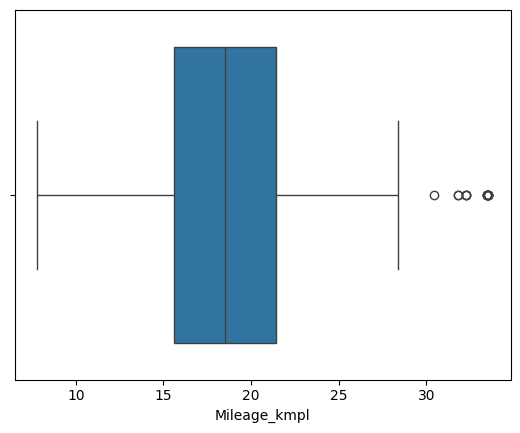

In [60]:
sns.boxplot(x="Mileage_kmpl",data=df_train)

In [61]:
df_train.loc[(df_train['Mileage_kmpl']>=15), 'Mil_cat'] = '1등급' # 연비가 15이상이면 1등급
df_train.loc[(df_train['Mileage_kmpl']<15), 'Mil_cat'] = '2등급 이하' #연비가 15미만이면 2등급 이하
df_train.head(3)

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,Brand,Year_cat,car_cat,연식,연식_mean,가성비,Mil_cat
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,2012이전,경차,10,8089.378,good,1등급
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,2012이후,소형,5,15921.566,good,1등급
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,2012이전,소형,9,10227.566,good,1등급


In [62]:
# # 연비 그룹 3개로 나눔
# df_train['Mileage_Group'] = pd.cut(df_train['Mileage_kmpl'], bins=3, labels=['Low', 'Medium', 'High'])
# grouped = df_train.groupby('Mileage_Group')['Price'].mean().round(3).reset_index()
# grouped.columns = ['Mileage_Group', 'Mileage_Group_mean']

# df_train=pd.merge(df_train, grouped, on="Mileage_Group", how='left')
# df_train

In [63]:
grouped = df_train.groupby('Mil_cat')['Price'].mean().round(3).reset_index() # 2개 등급으로 나눔
grouped.columns = ['Mil_cat', 'Mil_cat_mean']

df_train=pd.merge(df_train, grouped, on="Mil_cat", how='left')
df_train

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,Brand,Year_cat,car_cat,연식,연식_mean,가성비,Mil_cat,Mil_cat_mean
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,2012이전,경차,10,8089.378,good,1등급,11458.408
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,2012이후,소형,5,15921.566,good,1등급,11458.408
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,2012이전,소형,9,10227.566,good,1등급,11458.408
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,Maruti,2012이전,소형,8,10805.414,good,1등급,11458.408
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,Audi,2012이후,중형,7,12459.628,good,1등급,11458.408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,Coimbatore,19437.93,2018,31542,Petrol,Manual,First,5.0,17.40,1497.0,117.30,Honda,2012이후,소형,2,23122.351,bad,1등급,11458.408
5848,Pune,10822.70,2016,41413,Diesel,Manual,First,5.0,27.28,1047.0,69.00,Tata,2012이후,소형,4,17718.594,good,1등급,11458.408
5849,Kochi,13474.72,2017,39015,Petrol,Manual,First,5.0,17.00,1497.0,121.36,Ford,2012이후,소형,3,20345.072,bad,1등급,11458.408
5850,Kochi,16203.39,2017,21380,Diesel,Manual,First,5.0,24.30,1248.0,88.50,Maruti,2012이후,소형,3,20345.072,good,1등급,11458.408


In [64]:
# 경제 수준에 따라 구분

df_train.loc[df_train['Location']=='Mumbai', 'Location_cat'] = 'high'
df_train.loc[df_train['Location']=='Hyderabad', 'Location_cat'] = 'high'

df_train.loc[df_train['Location']=='Coimbatore', 'Location_cat'] = 'medium'
df_train.loc[df_train['Location']=='Kochi', 'Location_cat'] = 'medium'
df_train.loc[df_train['Location']=='Pune', 'Location_cat'] = 'medium'
df_train.loc[df_train['Location']=='Delhi', 'Location_cat'] = 'medium'

df_train.loc[df_train['Location']=='Kolkata', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Chennai', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Jaipur', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Bangalore', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Ahmedabad', 'Location_cat'] = 'low'

In [65]:
df_train['Year'].value_counts()

2014    777
2016    740
2015    729
2013    634
2017    609
2012    565
2011    456
2010    323
2018    310
2009    193
2008    163
2007    122
2019    102
2006     76
2005     53
Name: Year, dtype: int64

In [66]:
df_train.loc[df_train['Seats']<= 5.0, 'Seats_5'] = '5 좌석'  # 좌석 5, 5미만, 5초과로 구분
df_train.loc[df_train['Seats'] > 5.0, 'Seats_5'] = '5 초과 좌석'
df_train.loc[df_train['Seats'] < 5.0, 'Seats_5'] = '5 미만 좌석'

In [67]:
df_train['new_Year'] = df_train['Year']  # 2010년도 이하 수치가 적어서 2010년 이하로 묶어서 new_Year변수 생성
df_train.loc[df_train['Year'] <= 2010, 'new_Year'] = '2010년 이하'

In [68]:
df_train['new_Year'].value_counts()

2010년 이하    930
2014        777
2016        740
2015        729
2013        634
2017        609
2012        565
2011        456
2018        310
2019        102
Name: new_Year, dtype: int64

## 통계 검정

<Axes: >

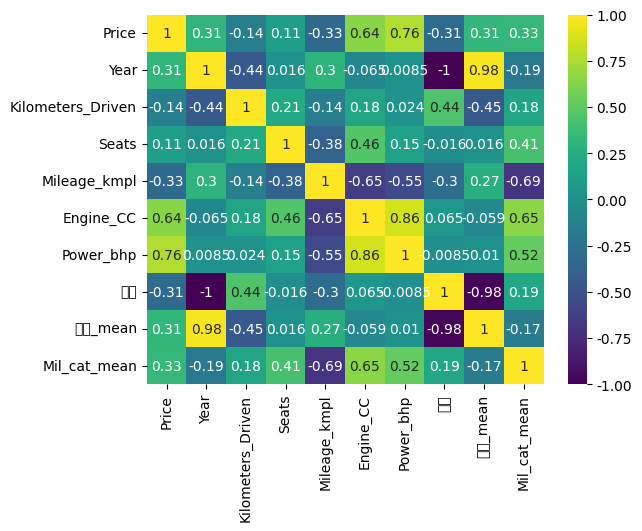

In [69]:
df_corr=df_train.corr()
sns.heatmap(df_corr, annot=True, cmap="viridis")

#### 회귀, 결정트리, 랜덤포레스트, 그래디언트부스팅, xgboost

In [70]:
df_train_reg = df_train.copy()

df_raw_dummy = pd.get_dummies(df_train_reg, drop_first = True)
df_raw_dummy.head()

train_df, test_df = train_test_split(df_raw_dummy, test_size = 0.3, random_state = 1234)

In [71]:
import statsmodels.api as sm

# 회귀 모델 정의
formula = "Price ~ Kilometers_Driven  +  \
Power_bhp  + C(Owner_Type) + C(Brand) + C(Location) +\
C(Year_cat) + C(car_cat) + C(Mil_cat)  + C(Seats_5) + C(new_Year)"

reg_model = smf.ols(formula=formula, data=df_train_reg)

# 회귀 모델 적합
reg_result = reg_model.fit()

# 회귀 결과 요약 출력
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     434.6
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:46:41   Log-Likelihood:                -60724.
No. Observations:                5852   AIC:                         1.215e+05
Df Residuals:                    5806   BIC:                         1.218e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [72]:
# 55 Page
# 다중공선성 재확인
df_train_x = df_train_reg[['Kilometers_Driven', 'Power_bhp']]

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,Variable,VIF
1,Kilometers_Driven,1.0
2,Power_bhp,1.0
0,const,8.0


# 가설검정...하려고 했으나 실패,,,

In [93]:
from scipy.stats import kruskal

# 'location'에 따른 자동차 가격 추출
price_high = df_train[df_train['Location'] == 'high']['Price'].values
price_middle = df_train[df_train['Location'] == 'middle']['Price'].values
price_low = df_train[df_train['Location'] == 'low']['Price'].values

# Kruskal-Wallis 검정 수행
stat, p_value = kruskal(price_high, price_middle, price_low)

print("Kruskal-Wallis H-statistic:", format(stat))
print("p-value:", p_value)


Kruskal-Wallis H-statistic: nan
p-value: nan


In [92]:
from scipy.stats import wilcoxon

# 'Location'에 따른 자동차 가격 추출
price_high = df_train[df_train['Location'] == 'high']['Price']
price_middle = df_train[df_train['Location'] == 'middle']['Price']
price_low = df_train[df_train['Location'] == 'low']['Price']

# 윌콕슨 검정 수행
stat_high_middle, p_value_high_middle = wilcoxon(price_high, price_middle)
print("Wilcoxon rank-sum statistic (high vs middle):", stat_high_middle)
print("p-value (high vs middle):", p_value_high_middle)

stat_high_low, p_value_high_low = wilcoxon(price_high, price_low)
print("\nWilcoxon rank-sum statistic (high vs low):", stat_high_low)
print("p-value (high vs low):", p_value_high_low)

stat_middle_low, p_value_middle_low = wilcoxon(price_middle, price_low)
print("\nWilcoxon rank-sum statistic (middle vs low):", stat_middle_low)
print("p-value (middle vs low):", p_value_middle_low)


Wilcoxon rank-sum statistic (high vs middle): nan
p-value (high vs middle): nan

Wilcoxon rank-sum statistic (high vs low): nan
p-value (high vs low): nan

Wilcoxon rank-sum statistic (middle vs low): nan
p-value (middle vs low): nan


# location, fuel_type, transmission 그래프화

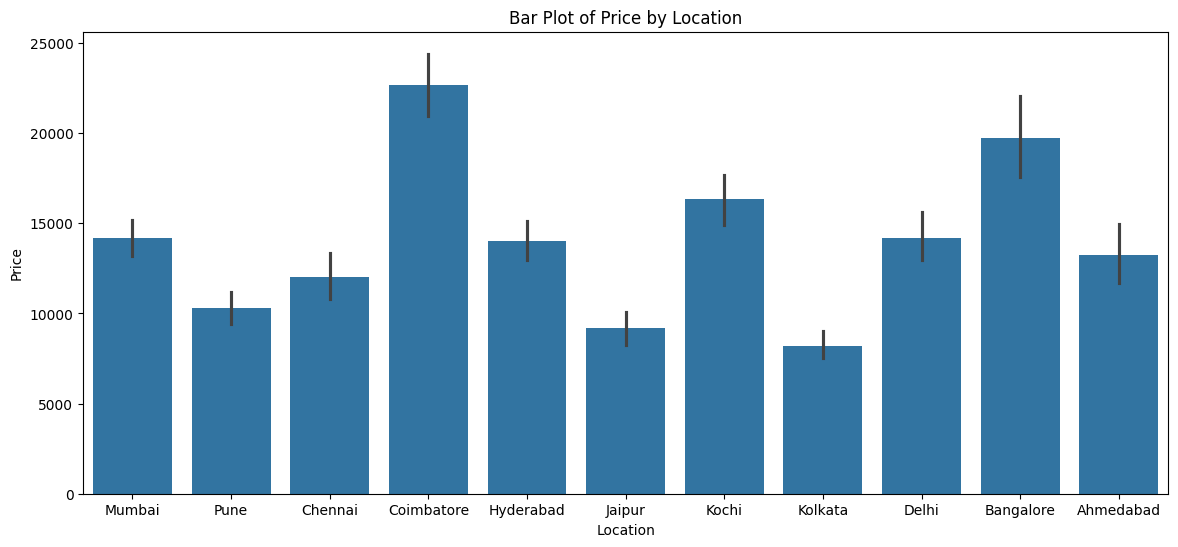

In [103]:
# Countplot을 이용한 막대그래프 생성
plt.figure(figsize=(14, 6))
sns.barplot(x='Location', y='Price', data=df_train)
plt.title('Bar Plot of Price by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()


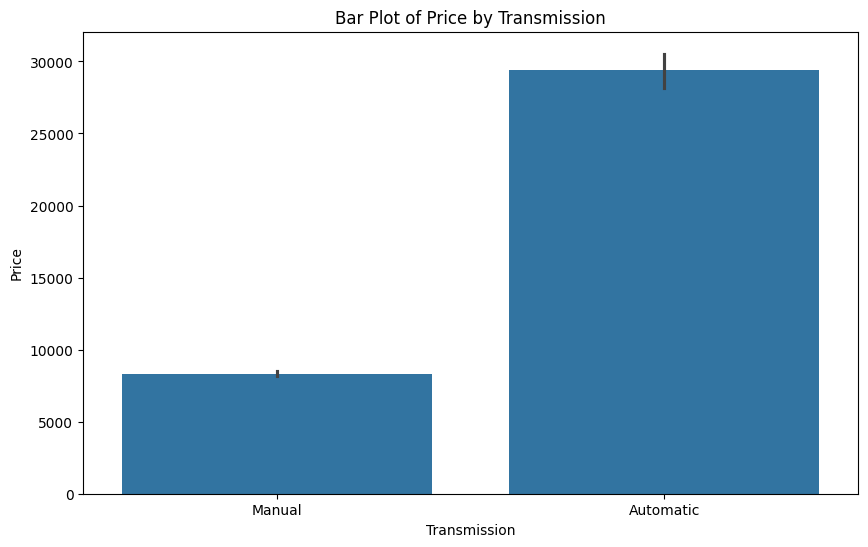

In [104]:

# Countplot을 이용한 막대그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x='Transmission', y='Price', data=df_train)
plt.title('Bar Plot of Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()


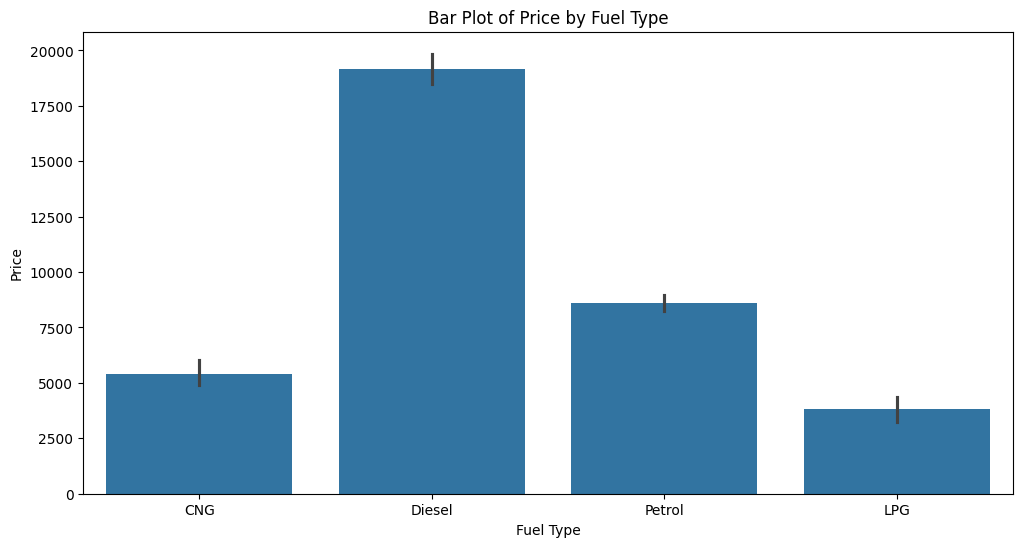

In [108]:
# Countplot을 이용한 막대그래프 생성
plt.figure(figsize=(12, 6))
sns.barplot(x='Fuel_Type', y='Price', data=df_train)
plt.title('Bar Plot of Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


# 랜덤포레스트

In [114]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy["Price"]
df_raw_x = df_raw_dummy.drop("Price", axis = 1, inplace = False)
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y)


Score on training set: 0.982
Score on test set: 0.910


In [134]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.982
Score on test set: 0.910


- 모델 설명력은 train 98.2%, test 91.0%로 해당 모델은 train 데이터에 과대적합 상태이다.

In [115]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [116]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.975,0.885
1,20,0.980,0.897
2,30,0.981,0.902
3,40,0.981,0.907
4,50,0.981,0.909
5,60,0.982,0.910
6,70,0.982,0.910
7,80,0.982,0.910
8,90,0.982,0.910
9,100,0.982,0.910


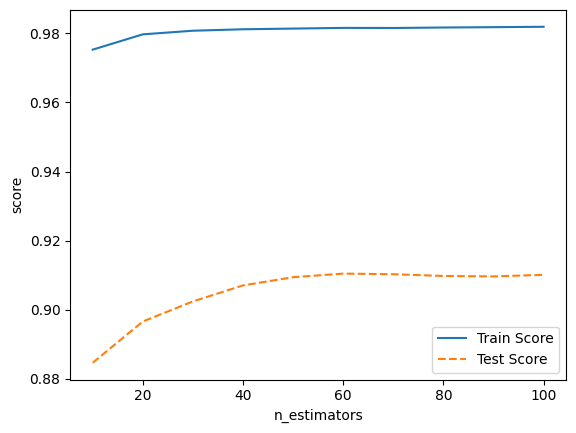

In [117]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

- 결정 트리 수가 증가함에 따라 모델의 설명력이 증가하는데 트리 수가 30개를 초과하면서부터는 거의 향상되지 않는 것을 확인할 수 있다.

In [140]:

# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.982,0.910
1,2,0.964,0.906
2,3,0.948,0.903
3,4,0.935,0.899
4,5,0.923,0.895
5,6,0.915,0.893
6,7,0.907,0.891
7,8,0.901,0.888
8,9,0.895,0.887
9,10,0.890,0.886


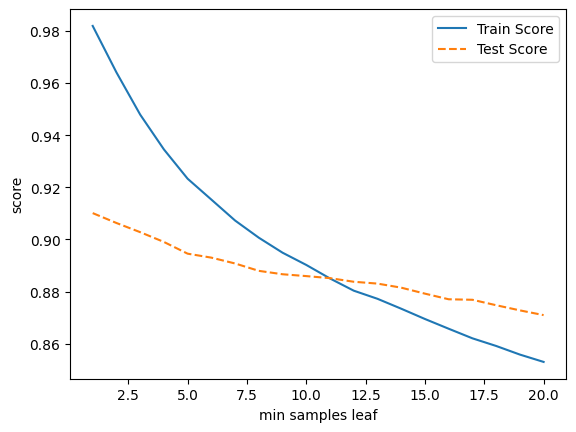

In [141]:

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

- 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 train과 test의 성능 변화를 고려하여 11을 선택하였다

-

In [144]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 11,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.915,0.893
1,6,0.915,0.893
2,8,0.915,0.893
3,10,0.915,0.893
4,12,0.915,0.893
5,14,0.913,0.892
6,16,0.910,0.892
7,18,0.908,0.892
8,20,0.905,0.892
9,22,0.903,0.891


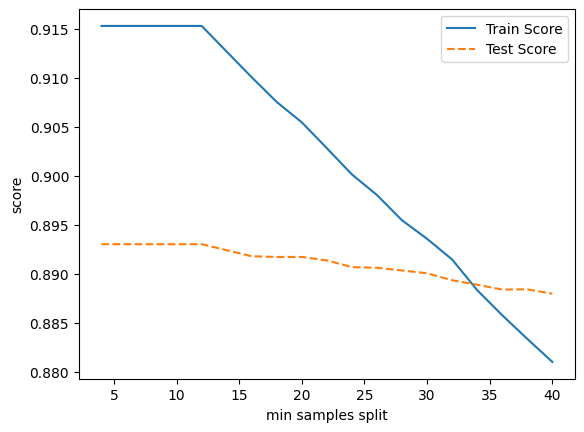

In [146]:

# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

- 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 train과 test의 데이터 성능 변화를 고려하여 30을 선택하였다.

In [147]:

# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                               min_samples_leaf = 11, min_samples_split = 30,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.502,0.503
1,2,0.675,0.699
2,3,0.771,0.793
3,4,0.826,0.846
4,5,0.855,0.870
5,6,0.868,0.878
6,7,0.874,0.881
7,8,0.876,0.883
8,9,0.878,0.884
9,10,0.878,0.884


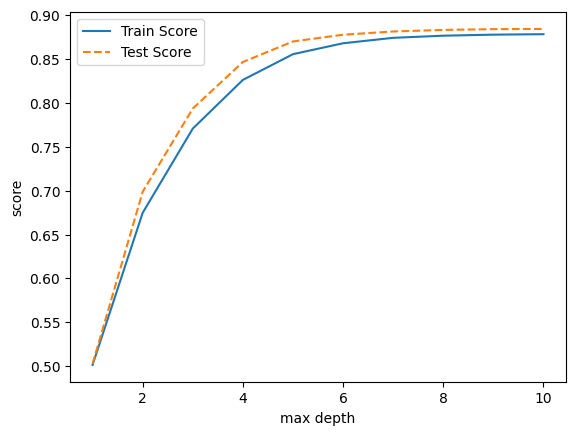

In [148]:

# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()


- 최대 깊이 증가에 따라 모델의 설명력은 증가하며 train/test 데이터의 정확도 변화를 고려하여 6을 선택하였다.

In [149]:

rf_final = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 11,
                                 min_samples_split = 30, max_depth = 6)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.868
Score on test set: 0.878


In [150]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 1569     7296.89
2844    10654.07
5851        7.08
3222     3602.46
5486    18778.76
2186     4982.12
52       5518.66
2689     7940.73
4635    10730.72
3046    23377.64
Name: Price, dtype: float64
test data의 예측값 : 
 [ 6927.11727593  9782.76610823  9904.32263568  3013.06446486
 15409.05941476  5706.51015685  7858.38044559  6348.7034821
  9991.36639378 26118.47580523]


In [151]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 1569     7296.89
2844    10654.07
5851        7.08
3222     3602.46
5486    18778.76
2186     4982.12
52       5518.66
2689     7940.73
4635    10730.72
3046    23377.64
Name: Price, dtype: float64
test data의 예측값 : 
 [ 6927.11727593  9782.76610823  9904.32263568  3013.06446486
 15409.05941476  5706.51015685  7858.38044559  6348.7034821
  9991.36639378 26118.47580523]


In [152]:
# 파라미터 값 확인
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 11,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [153]:

# 변수명 저장
v_feature_name = df_train_x.columns


In [154]:
# 147 Page
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,Power_bhp,0.754
6,연식,0.095
7,연식_mean,0.046
0,Year,0.037
4,Engine_CC,0.017
1,Kilometers_Driven,0.015
3,Mileage_kmpl,0.010
34,Brand_Mercedes-Benz,0.005
59,new_Year_2010년 이하,0.004
22,Transmission_Manual,0.004


Text(0, 0.5, '변수')

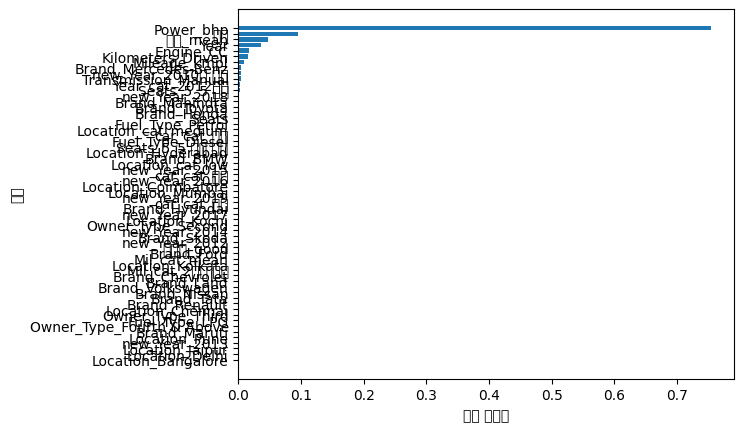

In [155]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

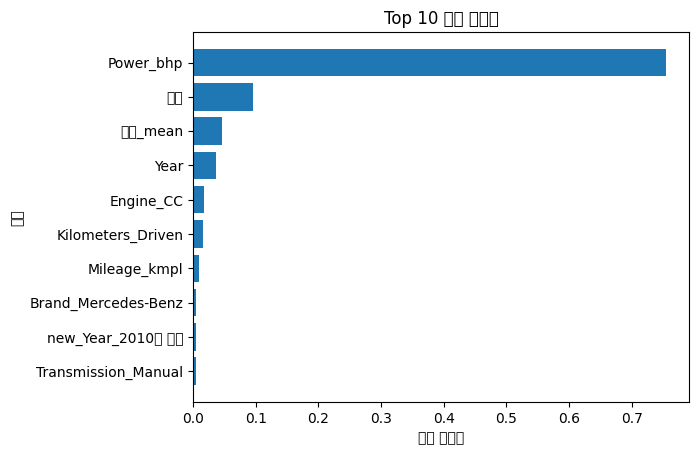

In [156]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)

# 상위 10개 변수 선택
df_top10_importance = df_importance.tail(10)

# 그래프 그리기
coordinates_top10 = range(len(df_top10_importance))
plt.barh(y=coordinates_top10, width=df_top10_importance["Importance"])
plt.yticks(coordinates_top10, df_top10_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.title("Top 10 변수 중요도")
plt.show()


- 변수 중요도에서 비중이 높은 순서대로 10개의 변수를 순위 나열하였다.
-